In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotx 

In [2]:
sns.set_style("darkgrid")
#plt.style.context(matplotx.styles.duftify(matplotx.styles.dracula))

In [4]:
data = pd.read_csv("./freeform_csv/combined_freeform_data.csv")
data.head()

,Protein,Strain Energy Cutoff,EF1%,EF5%,deltaEF1%,deltaEF5%,Linear Log10 AUC (x10),Delta Linear Log10 AUC (x10),ROC_AUC,Actives,Total Count,deltaAUC
0,CCR5,No Cutoff,2.9045,0.873029,0.0000,0.000000,1.370942,0.000000,0.485379,206,10371,0.000000
1,CCR5,4,0.0000,1.539239,-2.9045,0.666210,1.992932,0.621989,0.637352,52,1981,0.151973
2,CCR5,4.5,0.0000,1.288762,-2.9045,0.415733,1.898225,0.527283,0.619842,62,2477,0.134464
3,CCR5,5.0,0.0000,1.285003,-2.9045,0.411975,1.788464,0.417522,0.608217,78,3047,0.122838
4,CCR5,5.5,0.0000,1.101954,-2.9045,0.228925,1.585230,0.214288,0.565167,91,3610,0.079789


In [5]:
# Grouping the data by 'Strain Energy Cutoff' and calculating the mean of the delta values
grouped_data = (
    data.groupby("Strain Energy Cutoff")[
        ["deltaEF1%", "deltaEF5%", "Delta Linear Log10 AUC (x10)", "deltaAUC"]
    ]
    .mean()
    .reset_index()
)

# Display the grouped data
grouped_data

,Strain Energy Cutoff,deltaEF1%,deltaEF5%,Delta Linear Log10 AUC (x10),deltaAUC
0,4,1.637612,0.336621,0.118358,-0.010738
1,4.5,1.268833,0.216768,0.071258,-0.011485
2,5.0,0.906805,0.157382,0.047243,-0.013369
3,5.5,1.120510,0.230874,0.044038,-0.011268
4,6.0,1.434070,0.316940,0.079680,-0.009895
5,7.0,1.171766,0.185513,0.047718,-0.011616
6,7.5,1.379901,0.304533,0.065178,-0.011235
7,8.0,0.956015,0.333209,0.058785,-0.010055
8,No Cutoff,0.000000,0.000000,0.000000,0.000000
9,Top 10 Pareto Ranks,-2.781359,-1.407508,-0.154249,0.048905


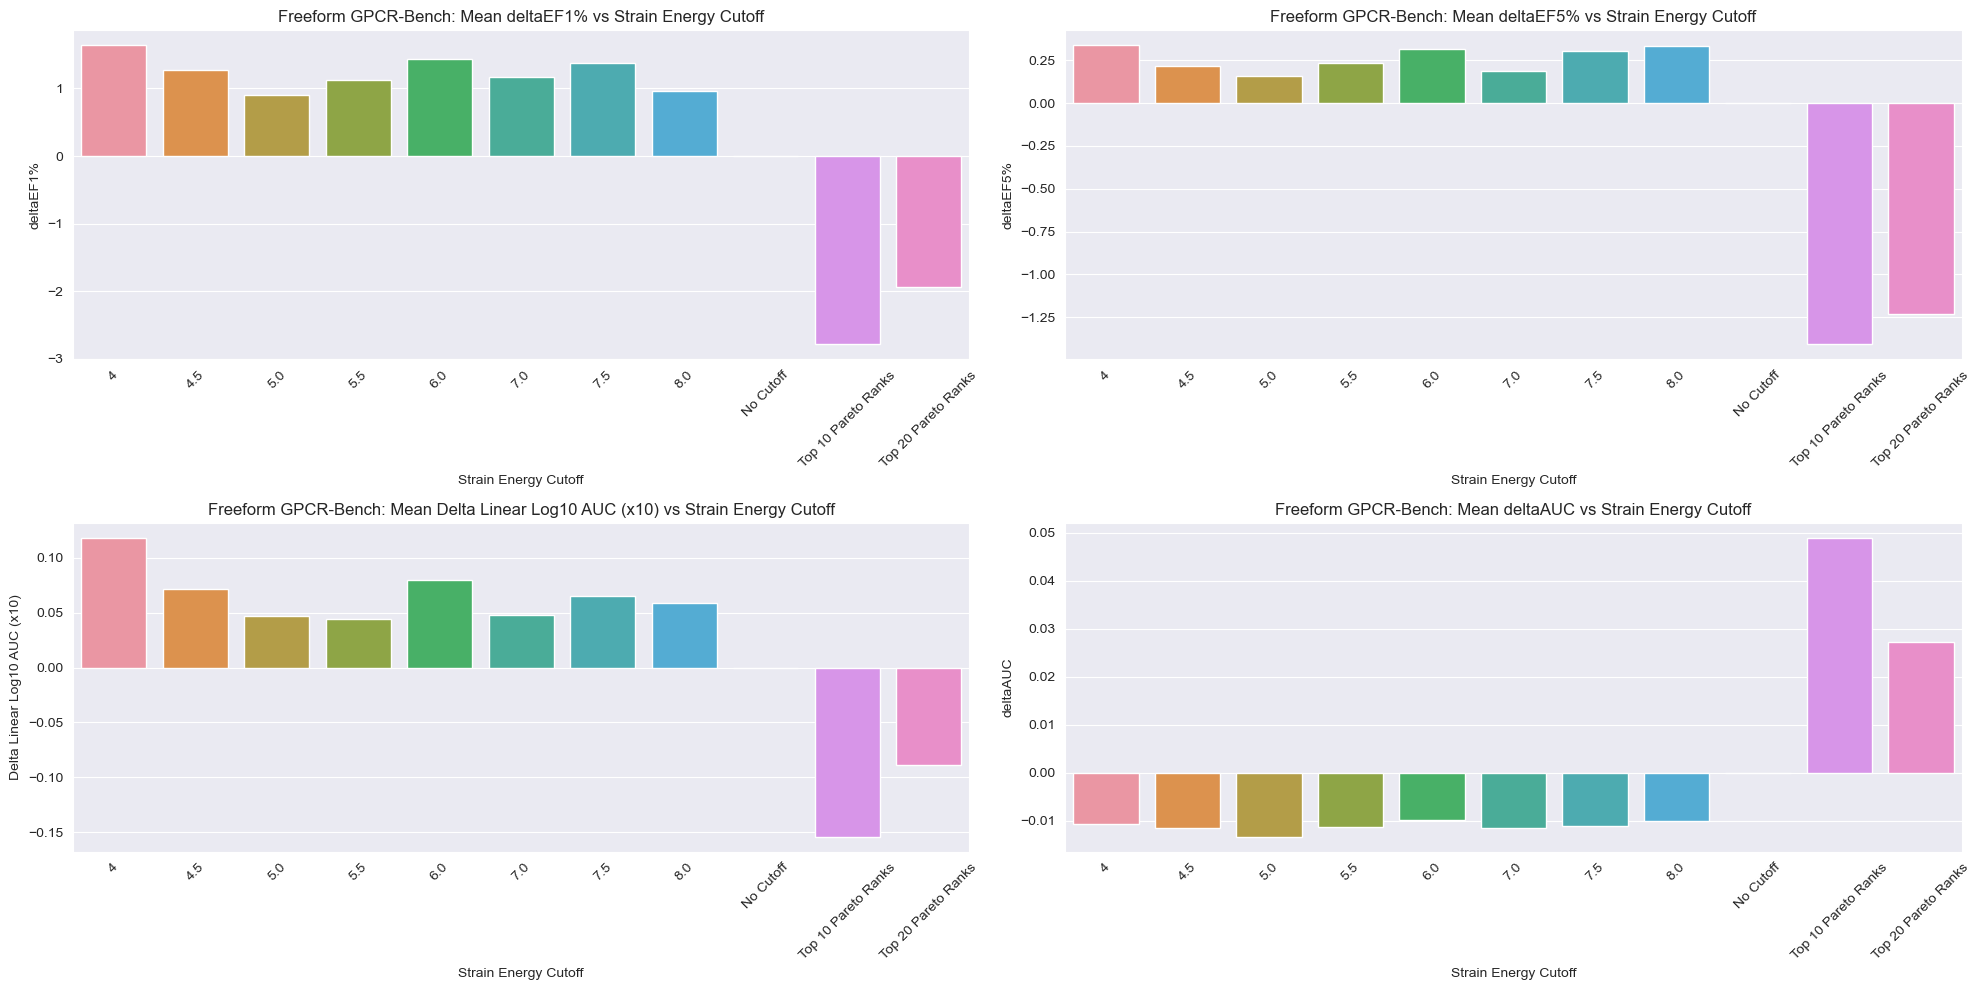

In [9]:
# for index, item_indexed in enumerate tracks the index and the item at that index
# here we are iterating over the columns of the grouped data
plt.figure(figsize=(20, 10))
for i, column in enumerate(["deltaEF1%", "deltaEF5%", "Delta Linear Log10 AUC (x10)", "deltaAUC"],1):
    plt.subplot(2,2,i)
    sns.barplot(
        x="Strain Energy Cutoff",
        y=column,
        data=grouped_data,
    )
    plt.xlabel("Strain Energy Cutoff")
    plt.ylabel(column)
    plt.xticks(rotation=45)
    plt.title(f"Freeform GPCR-Bench: Mean {column} vs Strain Energy Cutoff")

plt.tight_layout()
plt.show()

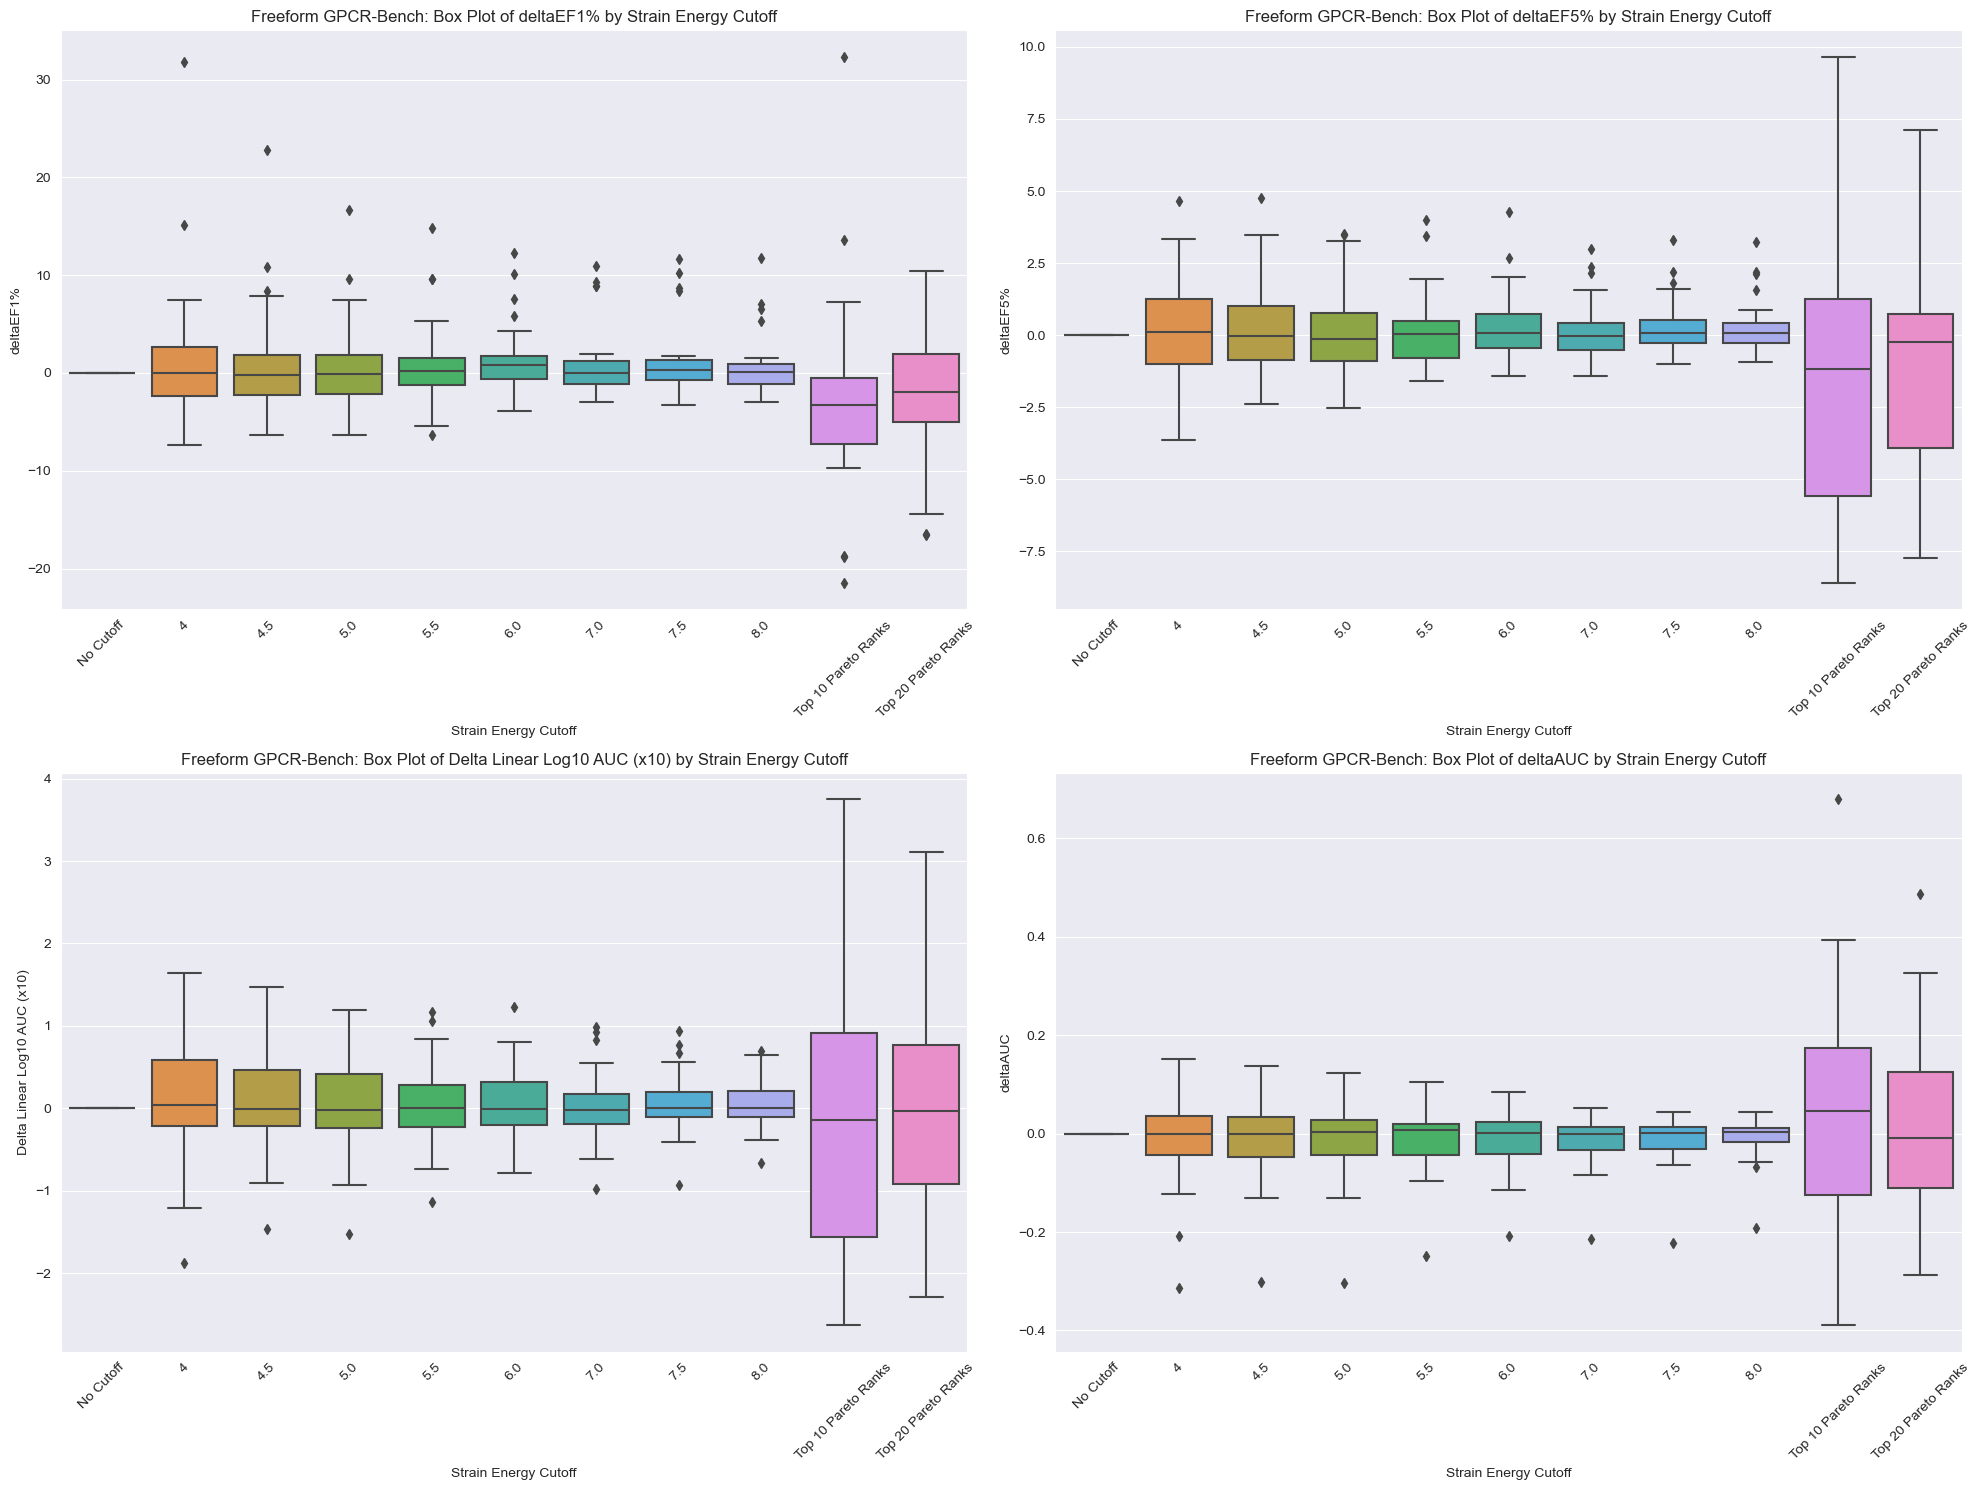

In [10]:
plt.figure(figsize=(20, 15))

# Define the metrics to plot
metrics = ["deltaEF1%", "deltaEF5%", "Delta Linear Log10 AUC (x10)", "deltaAUC"]

# Creating box plots for each metric
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x="Strain Energy Cutoff", y=metric, data=data)
    plt.xticks(rotation=45)
    plt.title(f"Freeform GPCR-Bench: Box Plot of {metric} by Strain Energy Cutoff")

# Adjust layout
plt.tight_layout()

# Show the plots without legends
plt.show()

/var/folders/2c/b9b_8fbs13j5zcz4wv9bqqjm0000gn/T/ipykernel_62691/3692982930.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Delta Linear Log10 AUC (x10)", y="Protein", data=cutoff_4_data, ci=None)


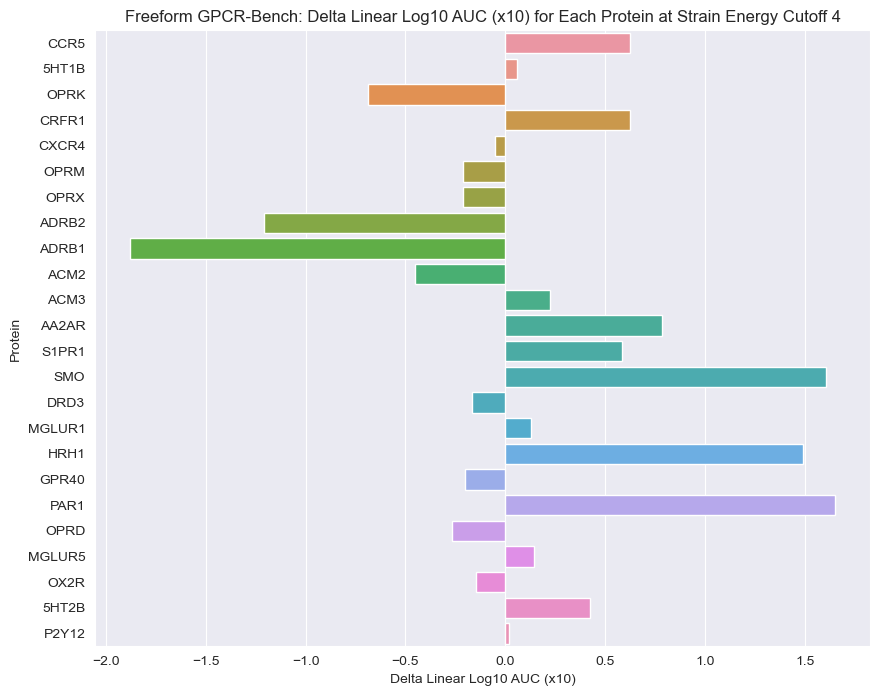

In [11]:
# Filter the dataset for strain energy cutoff of 4
cutoff_4_data = data[data["Strain Energy Cutoff"] == "4"]

# Create a bar plot of Delta Linear Log10 AUC (x10) for each protein at cutoff 4
plt.figure(figsize=(10, 8))
sns.barplot(x="Delta Linear Log10 AUC (x10)", y="Protein", data=cutoff_4_data, ci=None)
plt.title(
    "Freeform GPCR-Bench: Delta Linear Log10 AUC (x10) for Each Protein at Strain Energy Cutoff 4"
)
plt.xlabel("Delta Linear Log10 AUC (x10)")
plt.ylabel("Protein")

plt.show()

In [18]:
data.columns

Index(['Protein', 'Strain Energy Cutoff', 'EF1%', 'EF5%', 'deltaEF1%',
       'deltaEF5%', 'Linear Log10 AUC (x10)', 'Delta Linear Log10 AUC (x10)',
       'ROC_AUC', 'Actives', 'Total Count', 'deltaAUC'],
      dtype='object')

/var/folders/2c/b9b_8fbs13j5zcz4wv9bqqjm0000gn/T/ipykernel_62691/603475228.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="deltaEF1%", y="Protein", data=cutoff_4_data, ci=None)


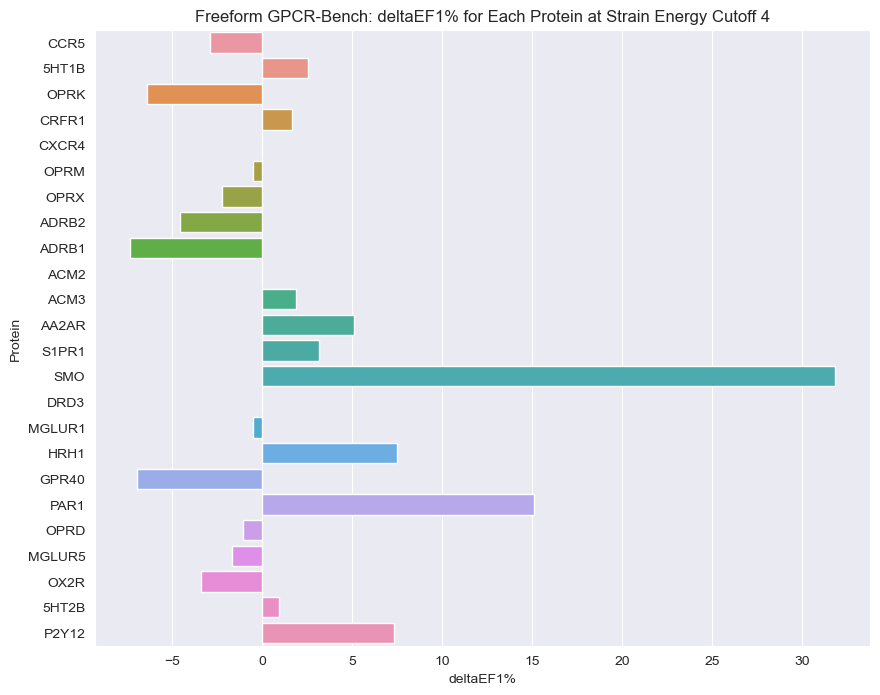

In [12]:
# Create a barplot plot of deltaEF1% for cutoff 4
plt.figure(figsize=(10, 8))
sns.barplot(x="deltaEF1%", y="Protein", data=cutoff_4_data, ci=None)
plt.title("Freeform GPCR-Bench: deltaEF1% for Each Protein at Strain Energy Cutoff 4")
plt.xlabel("deltaEF1%")
plt.ylabel("Protein")

plt.show()

/var/folders/2c/b9b_8fbs13j5zcz4wv9bqqjm0000gn/T/ipykernel_62691/3116186199.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="deltaEF5%", y="Protein", data=cutoff_4_data, ci=None)


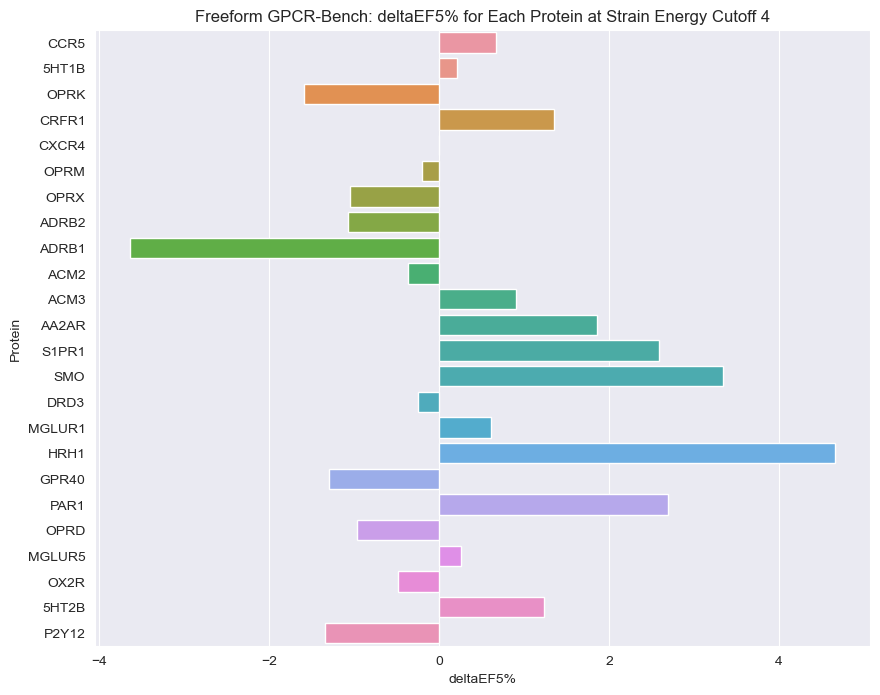

In [13]:
# Create a barplot plot of deltaEF5% for cutoff 4
plt.figure(figsize=(10, 8))
sns.barplot(x="deltaEF5%", y="Protein", data=cutoff_4_data, ci=None)
plt.title("Freeform GPCR-Bench: deltaEF5% for Each Protein at Strain Energy Cutoff 4")
plt.xlabel("deltaEF5%")
plt.ylabel("Protein")

plt.show()

/var/folders/2c/b9b_8fbs13j5zcz4wv9bqqjm0000gn/T/ipykernel_62691/1070658456.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Delta Linear Log10 AUC (x10)", y="Protein", data=cutoff_5_data, ci=None)


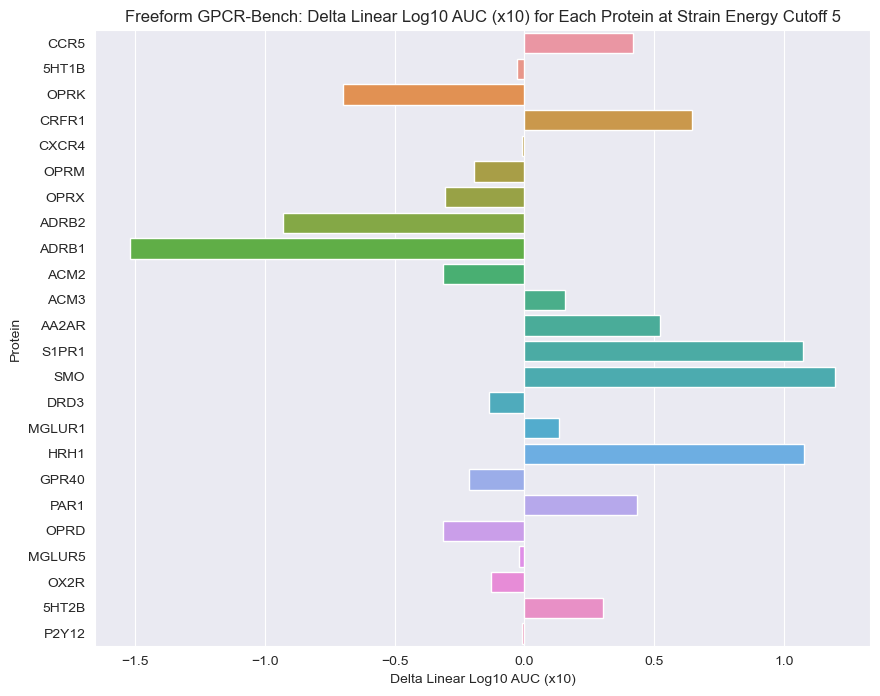

In [14]:
# filter the data for strain energy cut off of 5.0
cutoff_5_data = data[data["Strain Energy Cutoff"] == "5.0"]

# Create a bar plot of Delta Linear Log10 AUC (x10) for each protein at cutoff 5
plt.figure(figsize=(10, 8))
sns.barplot(x="Delta Linear Log10 AUC (x10)", y="Protein", data=cutoff_5_data, ci=None)
plt.title(
    "Freeform GPCR-Bench: Delta Linear Log10 AUC (x10) for Each Protein at Strain Energy Cutoff 5"
)
plt.xlabel("Delta Linear Log10 AUC (x10)")
plt.ylabel("Protein")

plt.show()

/var/folders/2c/b9b_8fbs13j5zcz4wv9bqqjm0000gn/T/ipykernel_62691/1536911011.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Delta Linear Log10 AUC (x10)", y="Protein", data=cutoff_5_data, ci=None)


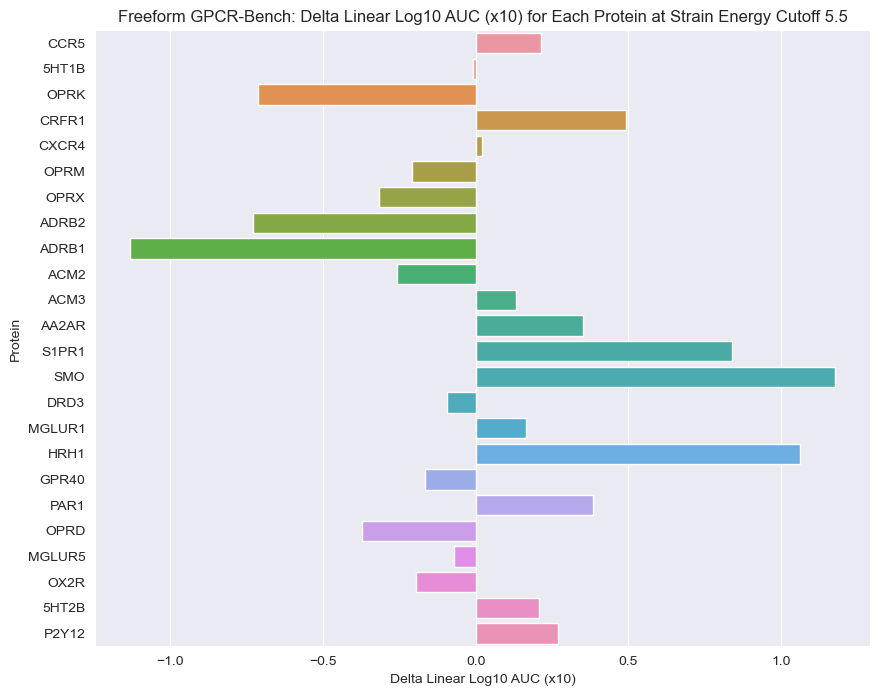

In [15]:
# filter the data for strain energy cut off of 5.0
cutoff_5_data = data[data["Strain Energy Cutoff"] == "5.5"]

# Create a bar plot of Delta Linear Log10 AUC (x10) for each protein at cutoff 5
plt.figure(figsize=(10, 8))
sns.barplot(x="Delta Linear Log10 AUC (x10)", y="Protein", data=cutoff_5_data, ci=None)
plt.title(
    "Freeform GPCR-Bench: Delta Linear Log10 AUC (x10) for Each Protein at Strain Energy Cutoff 5.5"
)
plt.xlabel("Delta Linear Log10 AUC (x10)")
plt.ylabel("Protein")

plt.show()

/var/folders/2c/b9b_8fbs13j5zcz4wv9bqqjm0000gn/T/ipykernel_35449/2574156726.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="deltaEF1%", y="Protein", data=cutoff_5_data, ci=None)


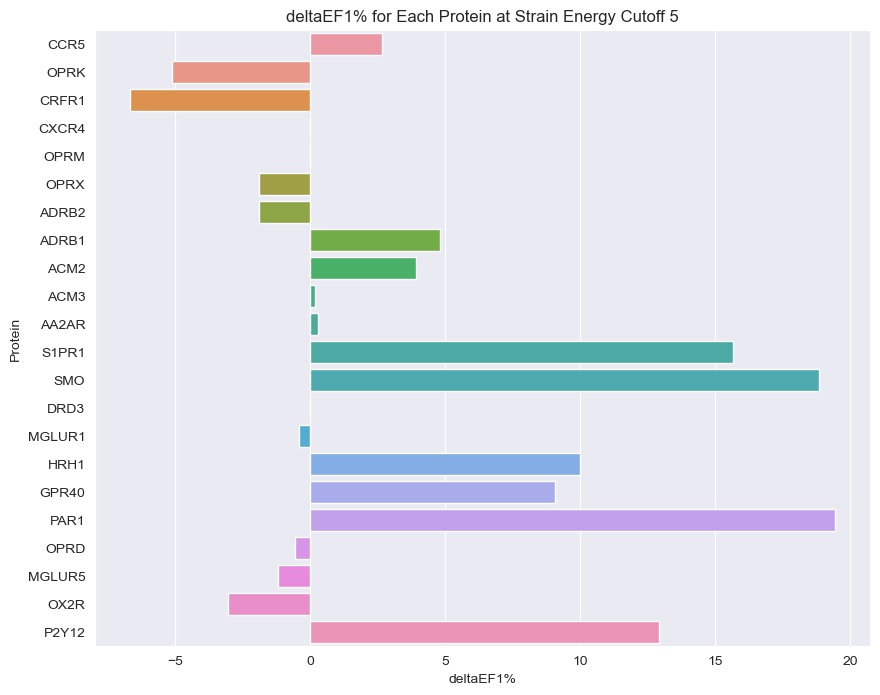

In [11]:
# Create a barplot plot of deltaEF1% for cutoff 5
plt.figure(figsize=(10, 8))
sns.barplot(x="deltaEF1%", y="Protein", data=cutoff_5_data, ci=None)
plt.title("Freeform GPCR-Bench: deltaEF1% for Each Protein at Strain Energy Cutoff 5")
plt.xlabel("deltaEF1%")
plt.ylabel("Protein")

plt.show()

/var/folders/2c/b9b_8fbs13j5zcz4wv9bqqjm0000gn/T/ipykernel_35449/1163253001.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="deltaEF5%", y="Protein", data=cutoff_5_data, ci=None)


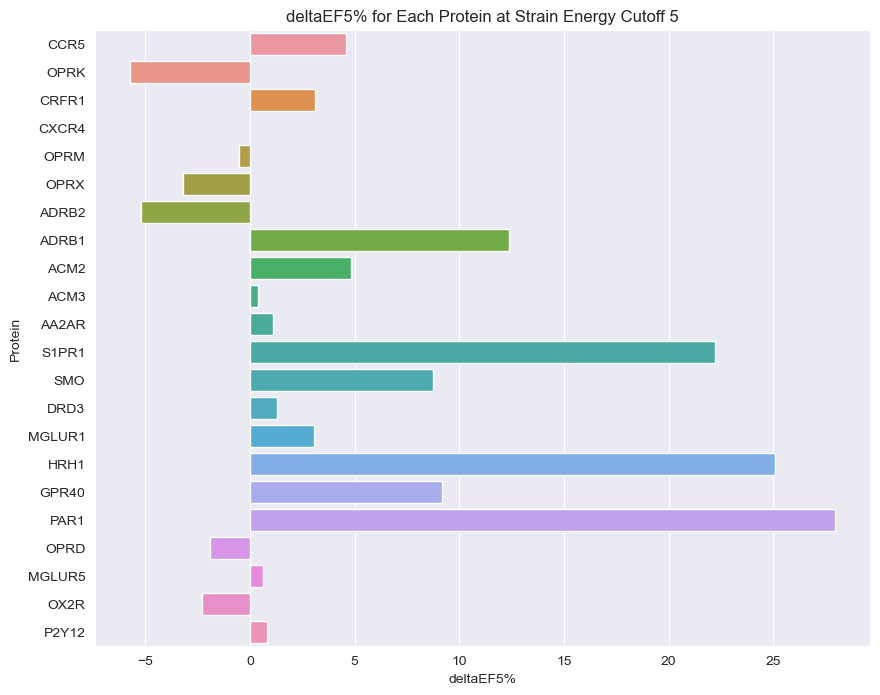

In [12]:
# Create a barplot plot of deltaEF5% for cutoff 5
plt.figure(figsize=(10, 8))
sns.barplot(x="deltaEF5%", y="Protein", data=cutoff_5_data, ci=None)
plt.title("Freeform GPCR-Bench: deltaEF5% for Each Protein at Strain Energy Cutoff 5")
plt.xlabel("deltaEF5%")
plt.ylabel("Protein")

plt.show()

/var/folders/2c/b9b_8fbs13j5zcz4wv9bqqjm0000gn/T/ipykernel_35449/3737209138.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Delta Linear Log10 AUC (x10)", y="Protein", data=cutoff_7_data, ci=None)


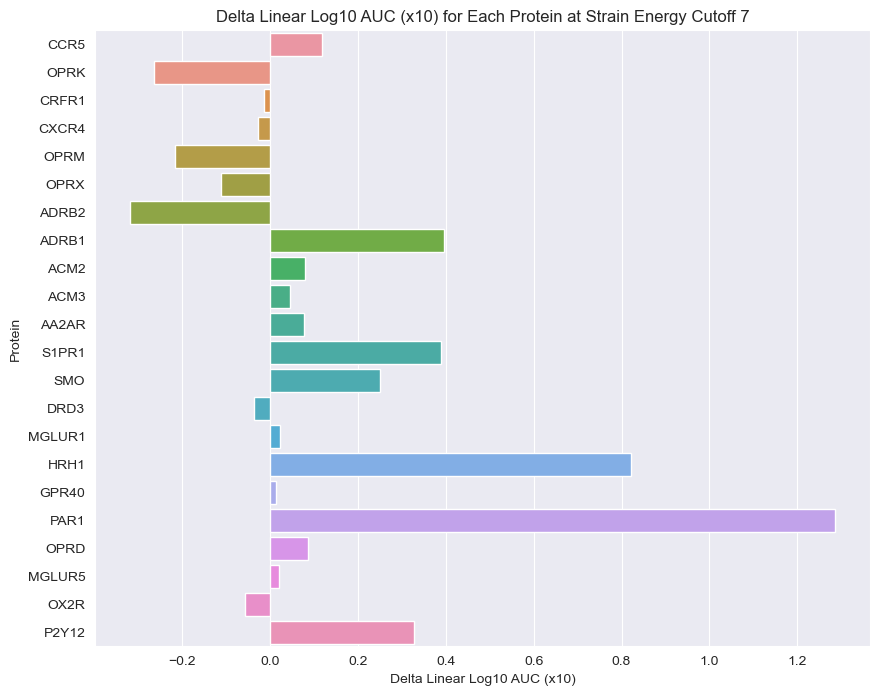

In [13]:
# filter the data for strain energy cut off of 7.0
cutoff_7_data = data[data["Strain Energy Cutoff"] == "7.0"]

# Create a bar plot of Delta Linear Log10 AUC (x10) for each protein at cutoff 5
plt.figure(figsize=(10, 8))
sns.barplot(x="Delta Linear Log10 AUC (x10)", y="Protein", data=cutoff_7_data, ci=None)
plt.title("Freeform GPCR-Bench: Delta Linear Log10 AUC (x10) for Each Protein at Strain Energy Cutoff 7")
plt.xlabel("Delta Linear Log10 AUC (x10)")
plt.ylabel("Protein")

plt.show()